#  Step 1: Load and Explore the Dataset

In [2]:
import pandas as pd 

In [3]:
jobs = pd.read_csv('fake_job_postings.csv')

In [4]:
jobs.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
9366,9367,Support,"IL, ,",NaN,NaN,"With offices in Herzeliya, Israel and London, ...","Our portfolio companies are growing fast, cons...",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
17617,17618,Office Assistant III,"US, FL, jacksonville",NaN,2000-3000,NaN,"Essential DutiesGreets callers and visitors, d...",Minimum QualificationsA high school graduate o...,All candidates are eligible for benefits inclu...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Telecommunications,Administrative,1
9327,9328,Senior Electrical Engineer,"US, FL, Lake Mary",NaN,NaN,NaN,RESPONSIBILITIES:This position is responsible ...,REQUIRED SKILLS:Ability to manage multiple pro...,NaN,0,1,0,Contract,NaN,NaN,NaN,NaN,0
2768,2769,Test Analyst,"IN, MH, Pune",IT,NaN,Nitor Infotech is an Information Technology co...,Strong experience on Manual Testing ...,0-2 years of experience in an IT companyPosses...,NaN,1,1,0,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Information Technology,0
16762,16763,Head of Marketing/Demand Generation,"NZ, N, Wellington",marketing,70000-200000,NaN,"“When a new product enters a market, no matter...",Design marketing campaigns that cover many tec...,Wipster offers an attractive compensation plan...,0,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Marketing,0


In [5]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
jobs.shape

(17880, 18)

# Step 2: Data Cleaning

In [8]:
jobs = jobs.drop(columns=['job_id', 'telecommuting'])

In [9]:
jobs.sample(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6079,Test Automation Engineer,"IL, TA, Tel",NaN,NaN,"Farmigo, a well funded Startup , develops a p...","As a Test Automation engineer you will define,...",Bachelors degree in Computer Science or relate...,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0
11963,Online Marketing Specialist,"EG, ALX,",NaN,1200-3000,BADR is an established company that is stridin...,Primary Responsibilities:Cooperate with design...,Bachelor's Degree (B.A.) in Marketing or relat...,NaN,1,0,Full-time,Entry level,Bachelor's Degree,Information Technology and Services,Marketing,0


In [10]:
# Combine relevant text columns
jobs['text'] = jobs[['title', 'company_profile', 'description', 'requirements', 'benefits']].fillna('').agg(' '.join, axis=1)

In [11]:
# Drop rows with missing target
jobs.dropna(subset=['fraudulent'], inplace=True)

#  Step 3: Text Preprocessing

In [12]:
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [15]:
def clean_text(text): 
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [16]:
jobs['clean_text'] = jobs['text'].apply(clean_text)

In [17]:
jobs.sample(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text,clean_text
2299,SIA security,"GB, LND,",NaN,0-0,SRS are a leading provider in the recruitment ...,Looking for SIA security for commonwealth game...,"SIA licence, tent, sleeping bag",£8/h,0,0,Temporary,Not Applicable,Unspecified,Security and Investigations,Other,0,SIA security SRS are a leading provider in the...,sia security sr leading provider recruitment s...
17101,"Senior Reporter, Private Equity Real Estate","GB, LND, London",NaN,30000-40000,PEI Media (#URL_4cffe430b8da4c0d7e6074d11e638d...,Real estate investment markets around the worl...,"The successful candidate should excel at news,...",PERE is published by PEI Media (#URL_4cffe430b...,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Publishing,Writing/Editing,0,"Senior Reporter, Private Equity Real Estate PE...",senior reporter private equity real estate pei...


# Step 4: Feature Extraction (TF-IDF)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)

In [20]:
X = vectorizer.fit_transform(jobs['clean_text'])
y = jobs['fraudulent']

# Step 5: Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Step 6: Model Training

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.45      0.62       181

    accuracy                           0.97      3576
   macro avg       0.99      0.73      0.80      3576
weighted avg       0.97      0.97      0.97      3576



In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

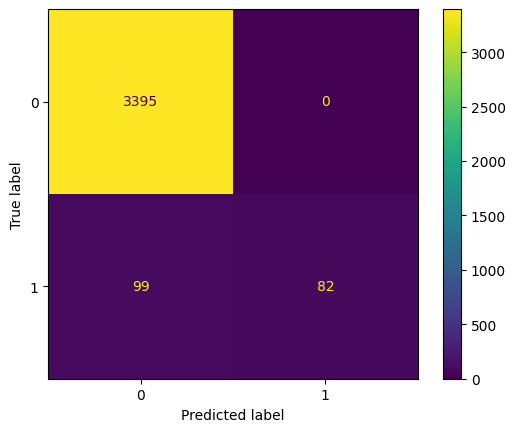

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.98      0.66      0.79       173

    accuracy                           0.98      3576
   macro avg       0.98      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576



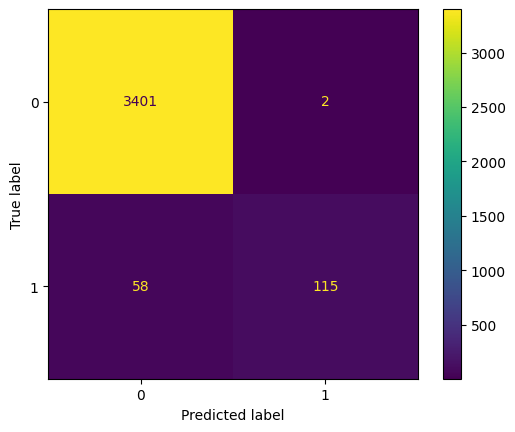

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split data with stratify to preserve label distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Step 7: Deployment of Model 

In [34]:
import pickle

# Save trained model
with open('job_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)